<a href="https://colab.research.google.com/github/sunjorkey/EIT2/blob/main/Housing_Data_Predictions_Linear_Regression_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm

In [ ]:
from geopy import Nominatim

In [ ]:
jet=cm.get_cmap('jet',20)

<ipython-input-50-3f3e22dd2ef8>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet=cm.get_cmap('jet',20)


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Week3/ass/raw_house_data.csv')

In [ ]:
data = data.replace('None', np.nan)
data['HOA'] = data['HOA'].str.replace(r'\D+', '', regex=True) 
data=data.dropna()
data.isnull().sum() 

MLS                 0
sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64

In [ ]:
data['bathrooms'] = data['bathrooms'].astype(float)
data['bedrooms'] = data['bedrooms'].astype(float)
data['year_built'] = data['year_built'].astype(int)
data['garage'] = data['garage'].astype(float)
data['bathrooms'] = data['bathrooms'].astype(float)
data['fireplaces'] = data['fireplaces'].astype(float)
data['HOA'] = data['HOA'].astype(float)


data['sqrt_ft'] = data['sqrt_ft'].astype(float)
data['sqrt_ft'] = data['sqrt_ft'].astype(int)

data['lot_acres']= data['lot_acres']*43560
data['lot_acres'] = data['lot_acres'].astype(int)

data['latitude']=data['latitude']*1000000
data['longitude']=data['longitude']*1000000
data['latitude'] = data['latitude'].astype(int)
data['longitude'] = data['longitude'].astype(int)

data['price_Per_Sqrt_ft'] = data['sold_price']/data['sqrt_ft']
data['price_Per_Sqrt_ft'] = data['price_Per_Sqrt_ft'].astype(int)


#KNN for address

In [ ]:
data.shape

(4370, 17)

In [ ]:
y=data["price_Per_Sqrt_ft"].to_numpy()

In [ ]:
X=data[['longitude',"latitude"]].to_numpy()

In [ ]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [ ]:
class KNNClassifier():

  def fit(self,X,y):
    self.X=X
    self.y=y

  def predict(self,X,K, epsilon =1e-3):
    N= len(X)
    y_hat=np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2,axis=1)    
      idxt = np.argsort(dist2)[:K]    #sorted indices 
      gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i]= np.bincount(self.y[idxt],weights=gamma_k).argmax()

    return y_hat

(31700000.0, 32530000.0)

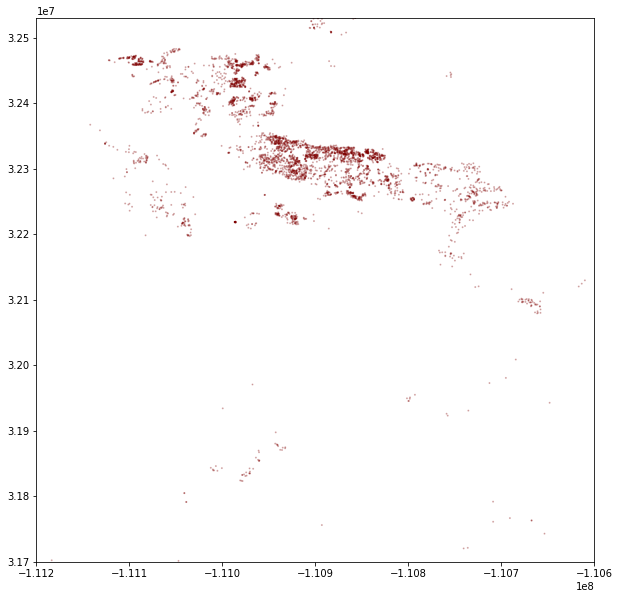

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=jet(y),s=1,alpha=.25)
plt.xlim(-111200000,-110600000) 
plt.ylim(31700000,32530000)


In [ ]:
knn=KNNClassifier()
knn.fit(X,y)


In [ ]:
y_hat= knn.predict(X,30)

In [ ]:
def LatLon_convert(address):
  geolocator = Nominatim(user_agent="mAIstros")
  X_test=[]
  location=geolocator.geocode(address)
  X_test.append([location.point[0],location.point[1]])

  return X_test

In [ ]:
LatLon_convert('1785 The Exchange SE Atlanta')

[[33.90915665, -84.47914869915438]]

In [ ]:
accuracy(y,y_hat)

0.9894736842105263

In [ ]:
data['address_price'] = y_hat

##KNN for land lot

In [ ]:
y=data["price_Per_Sqrt_ft"].to_numpy()

In [ ]:
X=data[['lot_acres',"sqrt_ft"]].to_numpy()

In [ ]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [ ]:
class KNNClassifier():

  def fit(self,X,y):
    self.X=X
    self.y=y

  def predict(self,X,K, epsilon =1e-3):
    N= len(X)
    y_hat=np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2,axis=1)    
      idxt = np.argsort(dist2)[:K]    #sorted indices 
      gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i]= np.bincount(self.y[idxt],weights=gamma_k).argmax()

    return y_hat

In [ ]:
knn=KNNClassifier()
knn.fit(X,y)

In [ ]:
y_hat= knn.predict(X,30)

In [ ]:
accuracy(y,y_hat)

0.9322654462242563

In [ ]:
data['lot_price'] = y_hat

##linear Regression

In [ ]:
data.dtypes

MLS                    int64
sold_price           float64
zipcode                int64
longitude              int64
latitude               int64
lot_acres              int64
taxes                float64
year_built             int64
bedrooms             float64
bathrooms            float64
sqrt_ft                int64
garage               float64
kitchen_features      object
fireplaces           float64
floor_covering        object
HOA                  float64
price_Per_Sqrt_ft      int64
address_price        float64
lot_price            float64
dtype: object

In [ ]:
y_lr=data["address_price"].to_numpy()
X_lr=data["lot_price"].to_numpy()

In [ ]:
class SimpleLinearReg():
  def fit(self,X,y):
    self.y=y
    self.d=np.mean(X**2)-np.mean(X)**2
    self.w0=(np.mean(y)*np.mean(X**2)-np.mean(X)*np.mean(X*y))/self.d
    self.w1=(np.mean(X*y)-(np.mean(X)*np.mean(y)))/self.d  


  def predict(self,X,show=0):
    y_hat=self.w1*X+self.w0

    if show:
      plt.figure()
      plt.scatter(X,self.y,s=8)
      plt.plot(X,y_hat,color="#FF0070")

    return y_hat  

In [ ]:
slr = SimpleLinearReg()

In [ ]:
slr.fit(X_lr,y_lr)

Text(0, 0.5, 'lot_price')

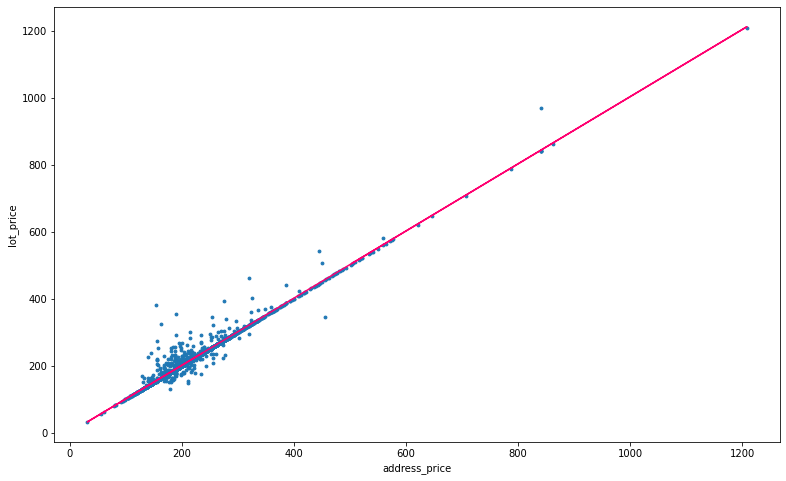

In [ ]:
y_hat=slr.predict(X_lr)
plt.figure(figsize=(13,8))
plt.scatter(X_lr,y_lr,s=8)
plt.plot(X_lr,y_hat,color="#FF0070")
plt.xlabel('address_price')
plt.ylabel('lot_price')
